In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [99]:
train_data=pd.read_csv("C:\\Users\\R Durga Bhavani\\Downloads\\fraudTrain.csv.zip")
test_data=pd.read_csv("C:\\Users\\R Durga Bhavani\\Downloads\\fraudTest.csv.zip")

In [100]:
train_data.drop(['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time', 'street'], axis=1, inplace=True)
train_data

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                       fraud_Lind-Buckridge  entertainment  220.11      M   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                        fraud_Keeling-Crist       misc_pos   41.96      M   
...                                      ...            ...     ...    ...   
1296670                    fraud_Reichel Inc  entertainment   15.56      M   
1296671             fraud_Abernathy and Sons    food_dining   51.70      M   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93      M   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90      M   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30      M   

                             city state    zip      lat      long  merch_lat  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781  36.011293   
1                          Orient    WA  99160  48.8878 -118.2105  49.159047   
2                      Malad City    ID  83252  42.1808 -112.2620  43.150704   
3                         Boulder    MT  59632  46.2306 -112.1138  47.034331   
4                        Doe Hill    VA  24433  38.4207  -79.4629  38.674999   
...                           ...   ...    ...      ...       ...        ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777  36.841266   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101  38.906881   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189  33.619513   
1296673                 Manderson    SD  57756  43.3526 -102.5411  42.788940   
1296674                      Sula    MT  59871  45.8433 -113.8748  46.565983   

         merch_long  is_fraud  
0        -82.048315         0  
1       -118.186462         0  
2       -112.154481         0  
3       -112.561071         0  
4        -78.632459         0  
...             ...       ...  
1296670 -111.690765         0  
1296671  -78.246528         0  
1296672 -105.130529         0  
1296673 -103.241160         0  
1296674 -114.186110         0  

[1296675 rows x 14 columns]

In [101]:
train_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  merch_lat  merch_long  is_fraud  
0  -81.1781  36.011293  -82.048315         0  
1 -118.2105  49.159047 -118.186462         0  
2 -112.2620  43.150704 -112.154481         0  
3 -112.1138  47.034331 -112.561071         0  
4  -79.4629  38.674999  -78.632459         0

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [103]:
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [104]:
train_data.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

          merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  
mean   3.853734e+01 -9.022646e+01  5.788652e-03  
std    5.109788e+00  1.377109e+01  7.586269e-02  
min    1.902779e+01 -1.666712e+02  0.000000e+00  
25%    3.473357e+01 -9.689728e+01  0.000000e+00  
50%    3.936568e+01 -8.743839e+01  0.000000e+00  
75%    4.195716e+01 -8.023680e+01  0.000000e+00  
max    6.751027e+01 -6.695090e+01  1.000000e+00

In [105]:
start_date = train_data['trans_date_trans_time'].min()
end_date = train_data['trans_date_trans_time'].max()
print(start_date)
print(end_date)

2019-01-01 00:00:18
2020-06-21 12:13:37


In [106]:
train_data['month_year'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.to_period('M')

In [107]:
categories=np.unique(train_data['category'])
print(len(categories))
categories

14


array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object)

<Axes: xlabel='category', ylabel='count'>

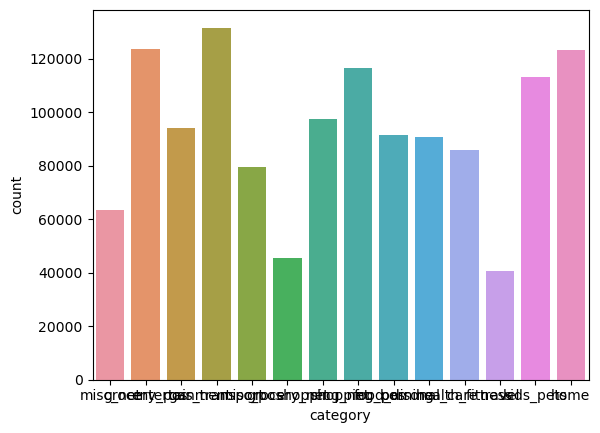

In [108]:
sns.countplot(data=train_data,x='category')

In [109]:
cat_counts = train_data.groupby(['category','is_fraud'])['is_fraud'].count().unstack()
cat_counts

is_fraud             0     1
category                    
entertainment    93781   233
food_dining      91310   151
gas_transport   131041   618
grocery_net      45318   134
grocery_pos     121895  1743
health_fitness   85746   133
home            122917   198
kids_pets       112796   239
misc_net         62372   915
misc_pos         79405   250
personal_care    90538   220
shopping_net     95830  1713
shopping_pos    115829   843
travel           40391   116

<Axes: xlabel='state', ylabel='count'>

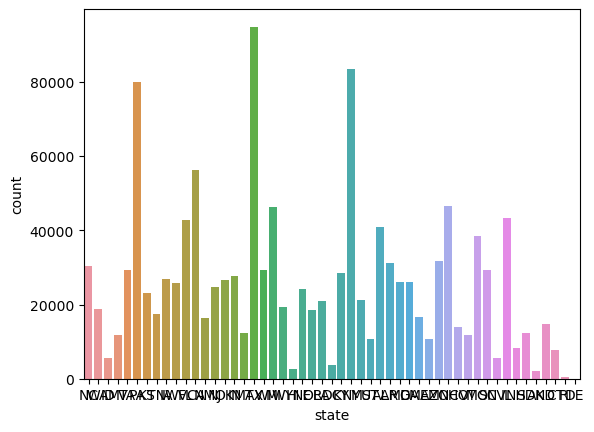

In [110]:
sns.countplot(data=train_data,x='state')

In [111]:
state_counts = train_data.groupby(['state','is_fraud'])['is_fraud'].count().unstack()
state_counts

is_fraud        0      1
state                   
AK         2084.0   36.0
AL        40774.0  215.0
AR        30966.0  161.0
AZ        10733.0   37.0
CA        56034.0  326.0
CO        13767.0  113.0
CT         7686.0   16.0
DC         3592.0   21.0
DE            NaN    9.0
FL        42390.0  281.0
GA        25917.0  146.0
HI         2552.0    7.0
IA        26843.0  142.0
ID         5534.0   11.0
IL        43004.0  248.0
IN        27438.0  142.0
KS        22840.0  156.0
KY        28320.0  155.0
LA        20874.0   91.0
MA        12307.0   69.0
MD        26036.0  157.0
ME        16386.0  119.0
MI        45916.0  238.0
MN        31507.0  207.0
MO        38212.0  191.0
MS        21073.0  115.0
MT        11722.0   32.0
NC        30117.0  149.0
ND        14729.0   57.0
NE        23988.0  180.0
NH         8219.0   59.0
NJ        24485.0  118.0
NM        16325.0   82.0
NV         5560.0   47.0
NY        82946.0  555.0
OH        46159.0  321.0
OK        26528.0  143.0
OR        18448.0  149.0
PA        79389.0  458.0
RI          535.0   15.0
SC        28997.0  193.0
SD        12250.0   74.0
TN        17414.0  140.0
TX        94397.0  479.0
UT        10638.0   61.0
VA        29052.0  198.0
VT        11696.0   72.0
WA        18828.0   96.0
WI        29205.0  163.0
WV        25545.0  146.0
WY        19212.0  110.0

In [112]:
city_frauds = train_data.groupby(['city', 'is_fraud'])['is_fraud'].count()
print(city_frauds)

city                       is_fraud
Achille                    0            519
                           1             13
Acworth                    0           2084
                           1             13
Adams                      0            516
                                       ... 
Yellowstone National Park  0            513
                           1             12
Zaleski                    0           1545
                           1             12
Zavalla                    0           1537
Name: is_fraud, Length: 1538, dtype: int64


In [113]:
gender_count = train_data['gender'].value_counts()
gender_count

F    709863
M    586812
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

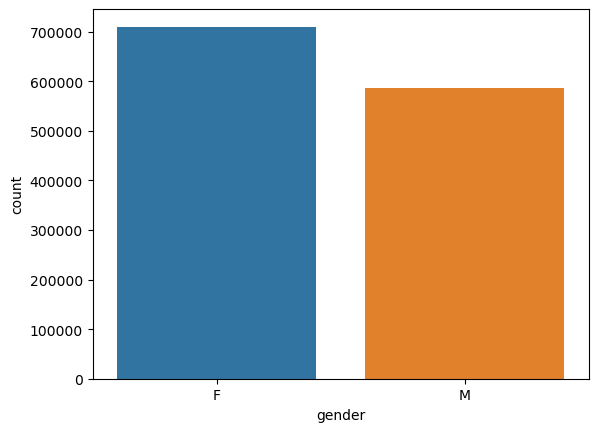

In [114]:
sns.countplot(data=train_data,x='gender')

In [115]:
trans_amount_gender = train_data.groupby('gender')['amt'].sum()
trans_amount_gender

gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64

In [116]:
state_amt = train_data.groupby('state')['amt'].sum()
state_amt

state
AK     144623.05
AL    2682717.10
AR    2342468.83
AZ     808325.53
CA    4138078.51
CO    1090171.31
CT     498323.98
DC     277115.46
DE       4630.44
FL    3155191.63
GA    1821058.13
HI     150985.03
IA    1770089.29
ID     405151.26
IL    3011891.30
IN    1896089.78
KS    1593906.51
KY    1886805.59
LA    1571503.33
MA     763584.19
MD    1699676.82
ME    1048856.74
MI    3282724.96
MN    2201786.07
MO    2637453.06
MS    1426619.58
MT     814623.55
NC    2329801.35
ND     968472.11
NE    1625146.83
NH     612651.91
NJ    1633983.29
NM    1002601.26
NV     317000.03
NY    6006499.03
OH    3396146.66
OK    1790296.32
OR    1309575.16
PA    5771009.53
RI      45066.67
SC    1877381.44
SD     870557.74
TN    1313513.23
TX    6800917.53
UT     688952.67
VA    2068711.63
VT     966098.03
WA    1396159.07
WI    2024087.77
WV    1819548.13
WY    1463800.48
Name: amt, dtype: float64

In [117]:
fraud_amt = train_data.groupby('is_fraud')['amt'].sum()
print(fraud_amt)

is_fraud
0    87234340.29
1     3988088.61
Name: amt, dtype: float64


array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

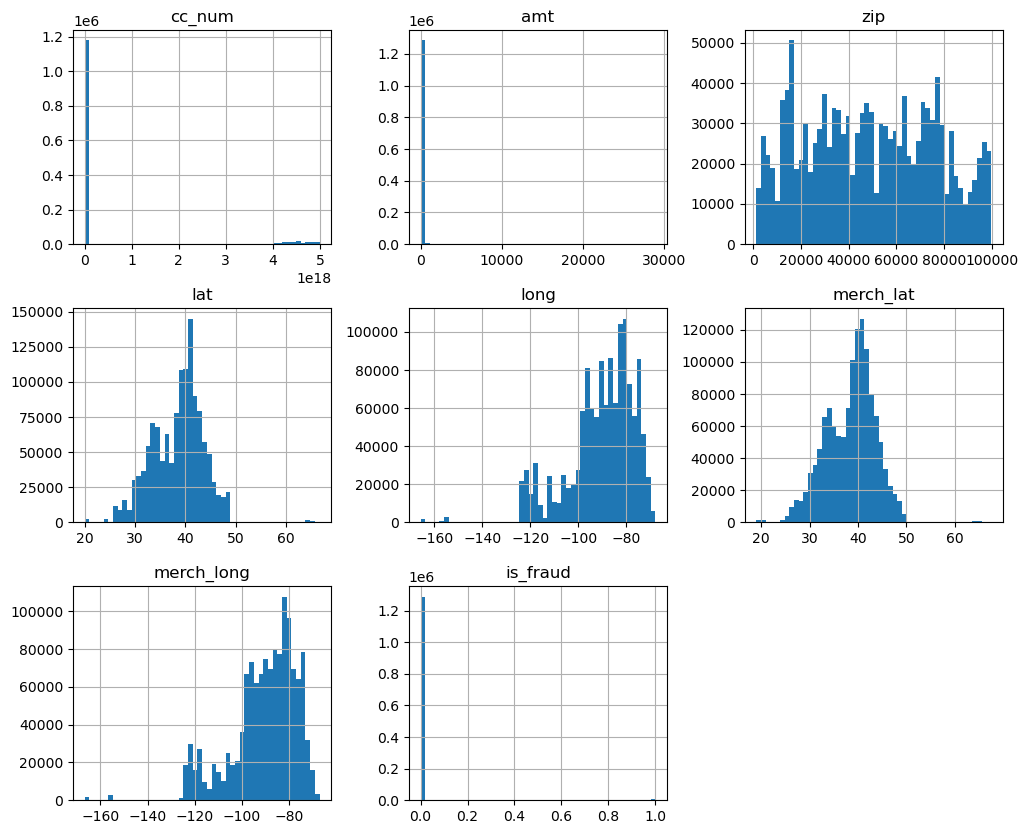

In [118]:
train_data.hist(bins=50, figsize=(12,10))

C:\Users\R Durga Bhavani\AppData\Local\Temp\ipykernel_23208\964581203.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


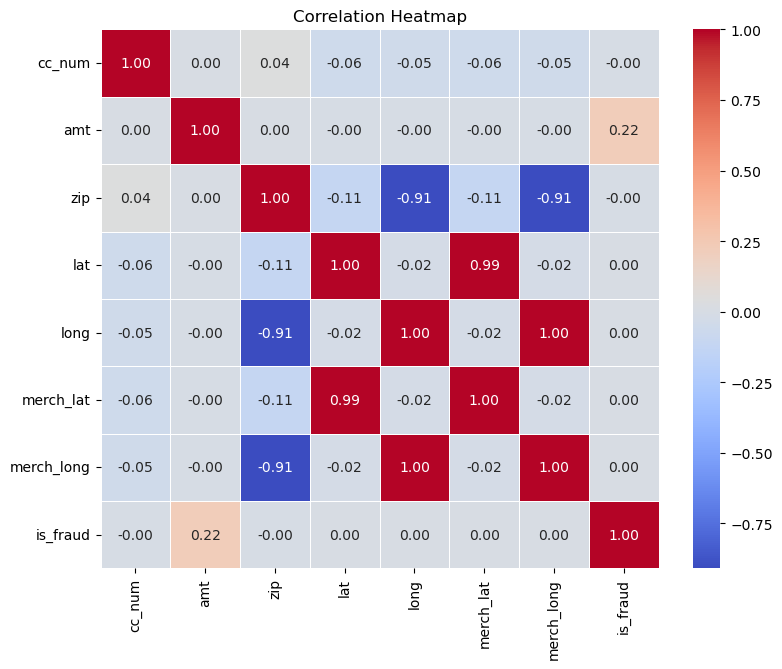

In [119]:
correlation = train_data.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.4)
plt.title('Correlation Heatmap')
plt.show()

In [120]:
test_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

In [121]:
test_data.shape

(555719, 23)

In [122]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [123]:
numeric_columns_train = train_data.select_dtypes(include='number')
numeric_columns_test = test_data.select_dtypes(include='number')

In [130]:
X_train = numeric_columns_train.drop(['is_fraud'], axis=1)
y_train = train_data['is_fraud']

X_test = numeric_columns_test.drop(['is_fraud'], axis=1)
y_test = test_data['is_fraud']

In [135]:
common_columns = X_train.columns.intersection(X_test.columns)
X_test_equal= X_test[common_columns]
X_train_equal = X_train[common_columns]
print(X_train_equal.shape)
print(X_test_equal.shape)

(1296675, 7)
(555719, 7)


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(X_train_equal)
x_test = scaler.fit_transform(x_test)

In [137]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train_equal,y_train)

C:\Users\R Durga Bhavani\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [139]:
y_pred= classifier.predict(X_test_equal)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
predict=classifier.predict(X_test_equal)

In [143]:
for i in predict[200:210]:
    if i == 0:
        print("legitimate")
    else:
        print("Fraudulent")

legitimate
legitimate
legitimate
legitimate
legitimate
legitimate
legitimate
legitimate
legitimate
legitimate


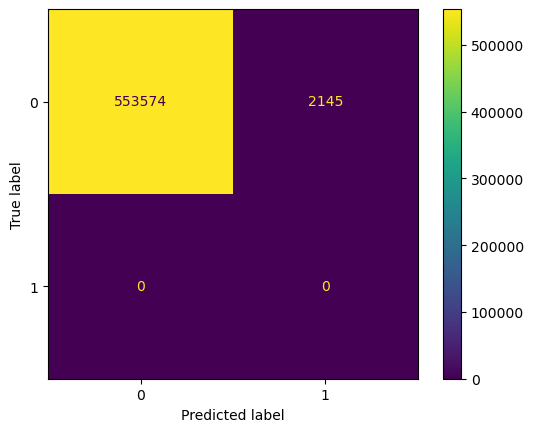

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.show()

In [145]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.9961401355721147


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

C:\Users\R Durga Bhavani\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



C:\Users\R Durga Bhavani\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\R Durga Bhavani\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
